# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 5**_

## Import Statements

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [16]:
base_path = "../Images/{}"

## Util Functions

In [17]:
def read_image(path, cvtcolor="RGB", cvtfloat=False):
    if cvtcolor == "RGB":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [18]:
def input_AB():
    A=eval(input('Enter the list A: '))
    B=eval(input('Enter the list B: '))

    # Type checking for human error in the input
    assert len(A)>0 and len(B) > 0, 'The length of A/B must be greater than 0'
    assert len(A)==len(B), 'The length of A and B must be the same'
    for i,j in zip(A,B):
        assert (type(i)==list or type(i) == tuple) and (type(j)==list or type(j) == tuple), 'The type of each element in A/B must be list/tuple'
        assert len(i) == 2 and len(j) == 2, 'The length of element in A/B must be 2'
    
    return A,B

In [19]:
def find_range_index(ranges, x):
    for index, (start, end) in enumerate(ranges):
        if start <= x < end:
            return index
    return None

def piecewise(image,A,B):
    new_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            index = find_range_index(A,image[i,j])
            if index is not None:
                m,c = B[index]
                new_image[i,j] = m * image[i,j] + c
    
    return new_image

In [43]:
def plot_piecewise(image, new_image, A, B):
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(new_image, cmap='gray')
    axs[1].set_title('Piecewise Linear Transformation')
    axs[1].axis('off')

    for i, ((x_start, x_end), (m, c)) in enumerate(zip(A, B)):
        x_vals = np.linspace(x_start, x_end, 1000)
        y_vals = m * x_vals + c

        axs[2].plot(x_vals, y_vals, color="red")
        axs[2].set_xlim(0, 1)
        axs[2].set_ylim(0, 1)
        axs[2].set_xlabel('Input Intensity')
        axs[2].set_ylabel('Output Intensity')
        axs[2].set_aspect('equal')

## Main Code

In [21]:
img1 = read_image('iris1.png', cvtcolor = "GRAY", cvtfloat=True)
img2 = read_image('stairs2.png', cvtfloat=True)

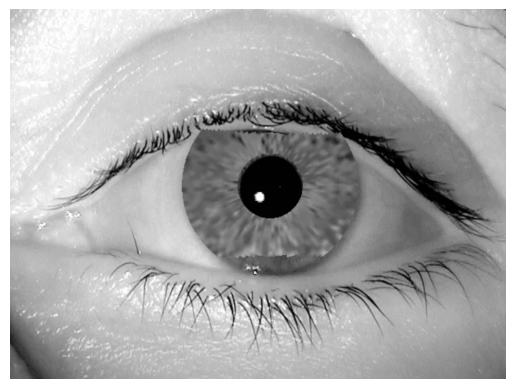

In [23]:
show_image(img1, cmap='gray')

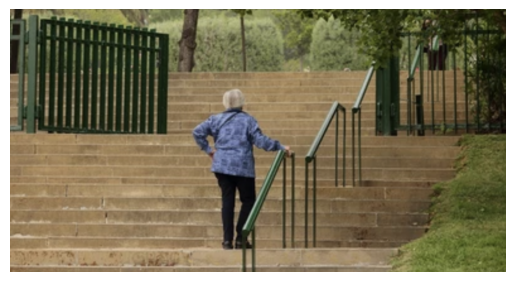

In [ ]:
show_image(img2)

### Image - iris1.png

In [24]:
# A,B = input_AB()
A=[(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1)]
B=[(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)]

In [26]:
new_image = piecewise(img1,A,B)

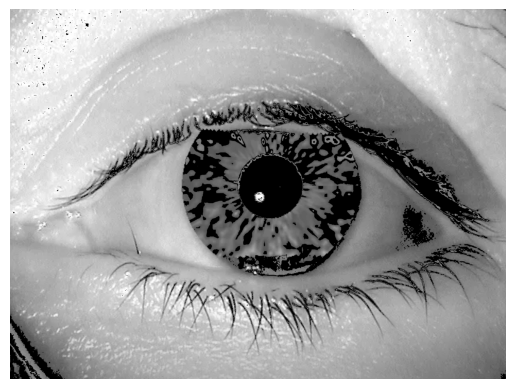

In [27]:
show_image(new_image, cmap='gray')

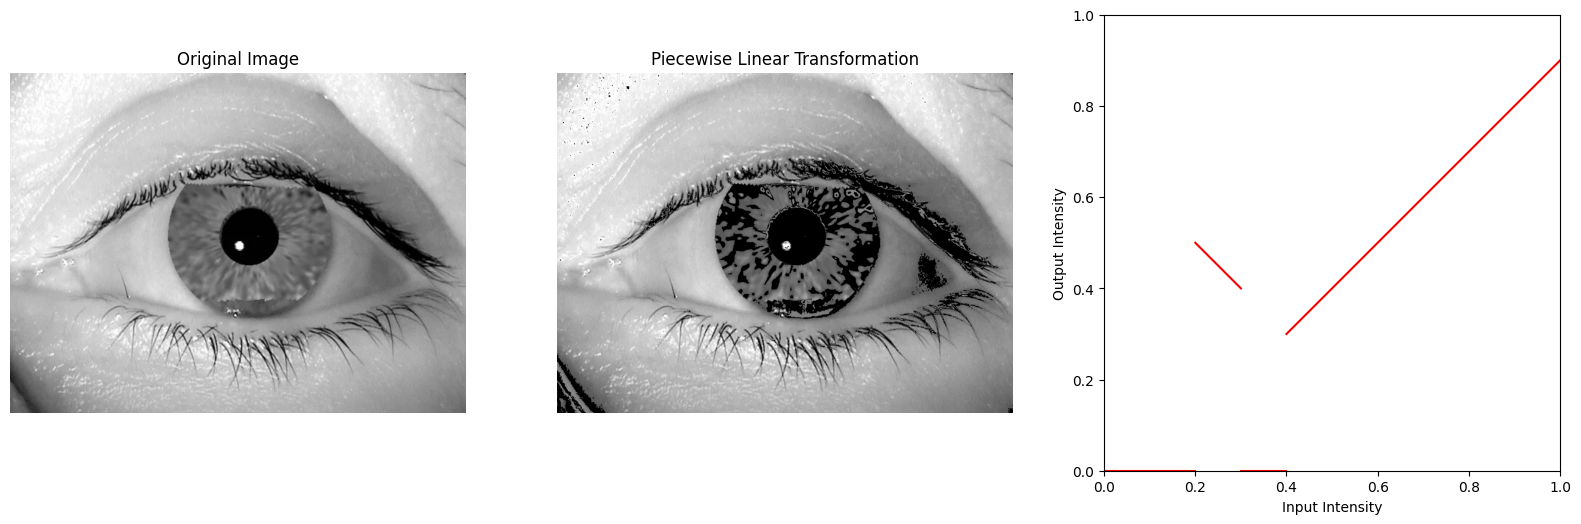

In [44]:
plot_piecewise(img1, new_image, A, B)